## logistic regression

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
churn=pd.read_csv('/content/churn_logistic.csv')

In [ ]:
churn

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Intl Plan,VMail Plan,Day Calls,...,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code,Phone,Churn
0,128,25,265.1,197.4,244.7,10.0,1,0,1,110,...,99,16.78,91,11.01,3,2.70,KS,415,382-4657,0
1,107,26,161.6,195.5,254.4,13.7,1,0,1,123,...,103,16.62,103,11.45,3,3.70,OH,415,371-7191,0
2,137,0,243.4,121.2,162.6,12.2,0,0,0,114,...,110,10.30,104,7.32,5,3.29,NJ,415,358-1921,0
3,84,0,299.4,61.9,196.9,6.6,2,1,0,71,...,88,5.26,89,8.86,7,1.78,OH,408,375-9999,0
4,75,0,166.7,148.3,186.9,10.1,3,1,0,113,...,122,12.61,121,8.41,3,2.73,OK,415,330-6626,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5695,224,0,171.5,160.0,212.4,5.0,1,1,0,99,...,103,13.60,102,9.56,2,1.35,DE,510,361-6563,1
5696,131,0,131.6,179.3,251.2,15.5,1,0,0,95,...,109,15.24,129,11.30,3,4.19,MS,415,333-9002,1
5697,132,0,291.2,234.2,191.7,8.9,1,0,0,104,...,132,19.91,87,8.63,3,2.40,MI,408,389-4608,1
5698,100,0,113.3,197.9,284.5,11.7,4,0,0,96,...,89,16.82,93,12.80,2,3.16,MT,415,341-4873,1


In [ ]:
def sigmoid(x):
  return 1/(1+np.e**-x)

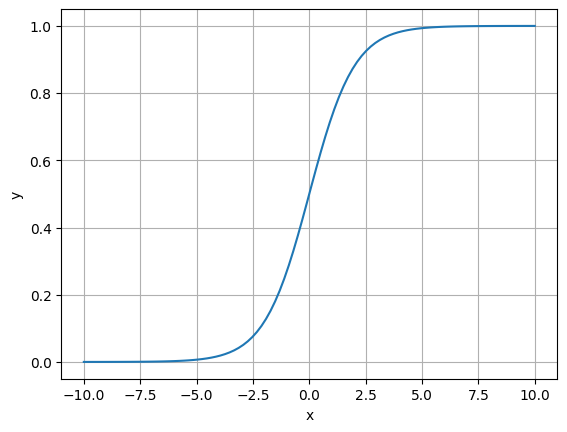

In [ ]:
x=np.linspace(-10,10,100) # 100 equidistant points between -10 to 10
y=sigmoid(x)
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

In [ ]:
churn.columns

Index(['Account Length', 'VMail Message', 'Day Mins', 'Eve Mins', 'Night Mins',
       'Intl Mins', 'CustServ Calls', 'Intl Plan', 'VMail Plan', 'Day Calls',
       'Day Charge', 'Eve Calls', 'Eve Charge', 'Night Calls', 'Night Charge',
       'Intl Calls', 'Intl Charge', 'State', 'Area Code', 'Phone', 'Churn'],
      dtype='object')

In [ ]:
cols=['Day Mins', 'Eve Mins', 'Night Mins', 'CustServ Calls', 'Account Length']
y=churn['Churn']
y=np.array(y).reshape(len(y),1) #reshaping our data to (m,1)
x=churn[cols]

In [ ]:
x.shape,y.shape

((5700, 5), (5700, 1))

In [ ]:
from sklearn.model_selection import train_test_split

x_train_cv,x_test,y_train_cv,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
x_train,x_val,y_train,y_val=train_test_split(x_train_cv,y_train_cv,test_size=0.25,random_state=1)

In [ ]:
x_train.shape,y_train.shape,x_val.shape,y_val.shape,x_test.shape,y_test.shape

((3420, 5), (3420, 1), (1140, 5), (1140, 1), (1140, 5), (1140, 1))

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [ ]:
scaler=StandardScaler()
scaler.fit(x_train)

x_train=scaler.transform(x_train)
x_val=scaler.transform(x_val)
x_test=scaler.transform(x_test)

In [ ]:
model=LogisticRegression()
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
model.intercept_,model.coef_

(array([-0.01215015]),
 array([[0.6844725 , 0.29104522, 0.13637423, 0.79640697, 0.0613349 ]]))

In [ ]:
prediction=model.predict(x_train)

In [ ]:
prediction_proba=model.predict_proba(x_train)[:,1]

In [ ]:
new_pred=np.where(prediction_proba>=0.6,1,0)

In [ ]:
def accuracy(y_true, y_pred):
  y_true = y_true.reshape(len(y_true))
  return np.sum(y_true==y_pred)/y_true.shape[0]

In [ ]:

accuracy(y_train,prediction)

0.7058479532163743

In [ ]:
accuracy(y_train,new_pred)

0.6885964912280702

In [ ]:
# accuracy on train validation and test set
train_pred=model.predict(x_train)
val_pred=model.predict(x_val)
test_pred=model.predict(x_test)

print('training accuracy: ',accuracy(y_train,train_pred))
print('validation accuracy: ',accuracy(y_val,val_pred))
print('test accuracy: ',accuracy(y_test,test_pred))

training accuracy:  0.7058479532163743
validation accuracy:  0.6982456140350877
test accuracy:  0.7008771929824561


In [ ]:
model=LogisticRegression() ## C is the regularization parameter =1/lambda


In [ ]:
from sklearn.pipeline import make_pipeline
train_scores=[]
val_scores=[]
scaler=StandardScaler()
for la in np.arange(0.01,5000.0,100): # range of values of lambda
  scaled_lr=make_pipeline(scaler,LogisticRegression(C=1/la))
  scaled_lr.fit(x_train,y_train)
  train_score=accuracy(y_train,scaled_lr.predict(x_train))
  val_score=accuracy(y_val,scaled_lr.predict(x_val))
  train_scores.append(train_score)
  val_scores.append(val_score)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

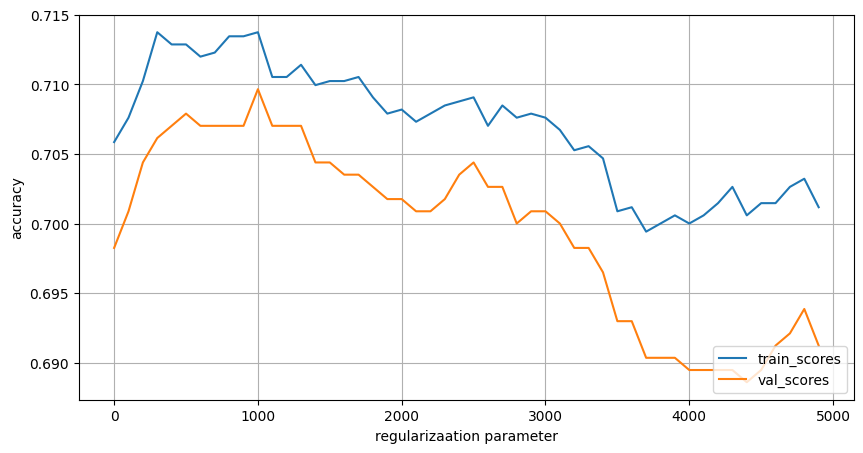

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(list(np.arange(0.01,5000.0,100)),train_scores,label='train_scores')
plt.plot(list(np.arange(0.01,5000.0,100)),val_scores,label='val_scores')
plt.legend(loc='lower right')

plt.xlabel('regularizaation parameter')
plt.ylabel('accuracy')
plt.grid()
plt.show()

In [ ]:
model=LogisticRegression(C=1/1000)
model.fit(x_train,y_train)

print('train accuracy:',accuracy(y_train,model.predict(x_train)))
print('test accuracy:',accuracy(y_test,model.predict(x_test)))

train accuracy: 0.7137426900584796
test accuracy: 0.7096491228070175


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
np.log(0.0001)

-9.210340371976182

In [ ]:
dt=pd.read_csv('/content/Spam_finalData.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/content/Spam_finalData.csv'

In [ ]:
dt.head()

,label_num,Feature0,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,Feature11,Feature12,Feature13,Feature14
0,0,-0.031489,-0.003323,-0.071238,0.047743,0.060798,0.046597,-0.069530,-0.000031,-0.037924,0.024059,-0.015085,-0.007752,-0.021617,-0.025395,0.046050
1,0,-0.122601,0.114176,0.460451,0.000953,0.014707,0.007610,-0.011173,-0.052478,0.040209,0.000076,0.010306,0.023397,-0.007294,0.063543,0.081119
2,0,-0.076681,-0.084330,-0.054658,-0.048236,-0.019999,-0.045909,-0.004712,-0.001524,0.013735,-0.022429,0.010273,-0.007458,-0.044340,-0.051093,0.025553
3,1,-0.075948,-0.059706,-0.025301,-0.037603,-0.001208,-0.030660,0.018873,-0.013434,-0.014981,0.000741,0.005653,0.032153,0.001884,-0.018005,-0.011060
4,0,-0.054680,0.033033,-0.090885,-0.047280,-0.029304,0.085893,-0.105351,-0.053915,-0.006857,0.021673,0.056718,0.006140,0.042217,0.018862,-0.007373


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(dt.drop(['label_num'],axis=1),dt['label_num'])

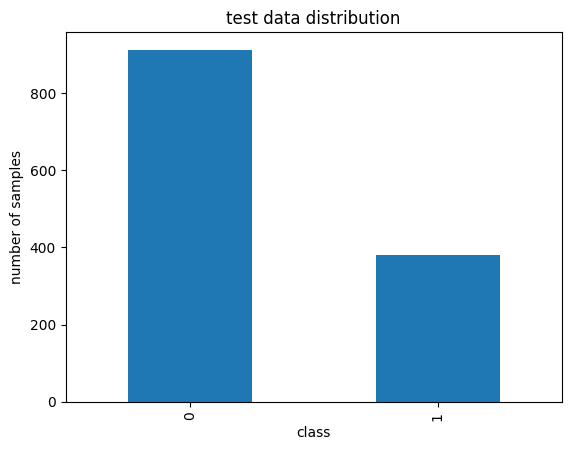

In [ ]:
y_test.value_counts().plot(kind='bar')
plt.xlabel('class')
plt.ylabel('number of samples')
plt.title('test data distribution')
plt.show()

In [ ]:
y_test.value_counts(normalize=True)

0    0.705336
1    0.294664
Name: label_num, dtype: float64

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
print('model accuracy: ',model.score(x_test,y_test))

model accuracy:  0.9350348027842227


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred=model.predict(x_test)

conf_matrix=confusion_matrix(y_test,y_pred)
conf_matrix # 2D np array

array([[855,  57],
       [ 27, 354]])

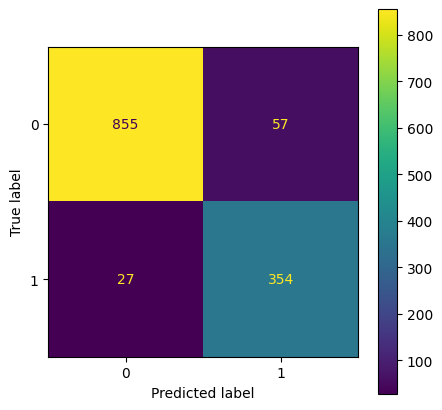

In [ ]:
fig, ax=plt.subplots(figsize=(5,5))
ConfusionMatrixDisplay(conf_matrix).plot(ax=ax)

In [ ]:
from sklearn.metrics import precision_score

precision_score(y_test,y_pred)

0.8613138686131386

In [ ]:
# (TP)/(TP+FP)
(351)/(351+72)

0.8297872340425532

In [ ]:
from sklearn.metrics import recall_score

recall_score(y_test,y_pred)

0.9291338582677166

In [ ]:
from sklearn.metrics import f1_score

f1_score(y_test,y_pred)

0.8939393939393939

In [ ]:
probabilities=model.predict_proba(x_test)[:,1]

In [ ]:
probabilities

array([0.45634163, 0.01733233, 0.64469264, ..., 0.15611569, 0.20847692,
       0.02630705])

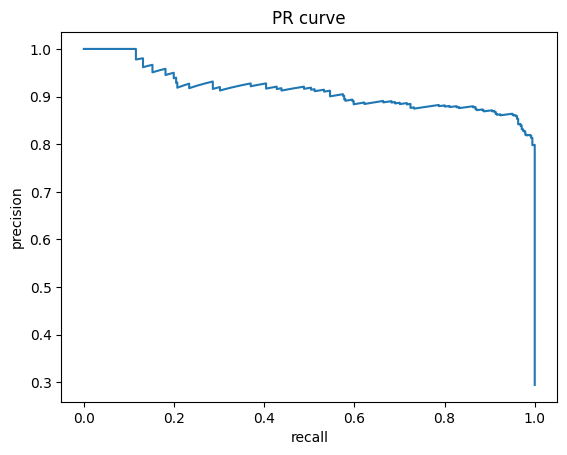

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score

precision,recall,thr=precision_recall_curve(y_test,probabilities)

plt.plot(recall,precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('PR curve')
plt.show()

In [ ]:
roc_auc_score(y_test,probabilities)

0.9736525532992587

In [ ]:
from sklearn.metrics import roc_curve
fpr,tpr,thr=roc_curve(y_test,probabilities)

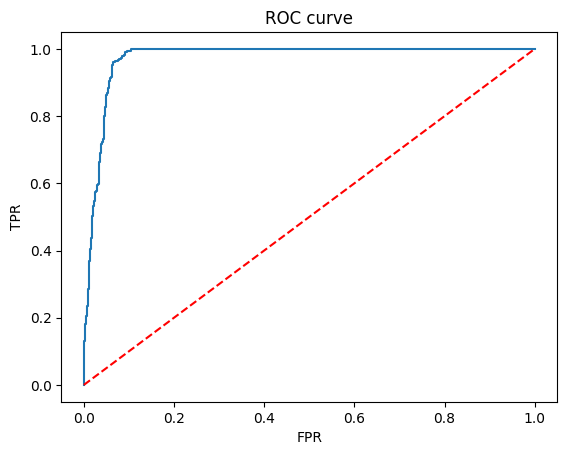

In [ ]:
plt.plot(fpr,tpr)
#random model
plt.plot(fpr,fpr,'--',color='red')
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()